# Text Classification and Sentimental Analysis

### 1. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df = pd.read_csv('amazonreviews.tsv', sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [5]:
df.shape

(10000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [7]:
df['label'].value_counts()

,count
label,
neg,5097
pos,4903


In [8]:
df = df.drop_duplicates(subset='review')

df.shape

(10000, 2)

In [9]:
df.isnull().sum()

,0
label,0
review,0


In [10]:
# Remove rows with missing reviews or labels
df = df.dropna(subset=['review', 'label'])

df.isnull().sum()

,0
label,0
review,0


In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back to string
    return ' '.join(tokens)

In [13]:
import nltk
nltk.download('punkt_tab')
df['clean_review'] = df['review'].apply(clean_text)

df[['review', 'clean_review']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,review,clean_review
0,Stuning even for the non-gamer: This sound tra...,stuning even nongamer sound track beautiful pa...
1,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anything im reading lot r...
2,Amazing!: This soundtrack is my favorite music...,amazing soundtrack favorite music time hands i...
3,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack truly like soundtrack enj...
4,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...


In [14]:
df['label_encoded'] = df['label'].map({'neg': 0, 'pos': 1})

df[['label', 'label_encoded']].head()

,label,label_encoded
0,pos,1
1,pos,1
2,pos,1
3,pos,1
4,pos,1


In [15]:
df.head()

,label,review,clean_review,label_encoded
0,pos,Stuning even for the non-gamer: This sound tra...,stuning even nongamer sound track beautiful pa...,1
1,pos,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anything im reading lot r...,1
2,pos,Amazing!: This soundtrack is my favorite music...,amazing soundtrack favorite music time hands i...,1
3,pos,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack truly like soundtrack enj...,1
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...,1


In [16]:
df.shape

(10000, 4)

### 2. Exploratory Analysis

In [17]:
from wordcloud import WordCloud
from collections import Counter

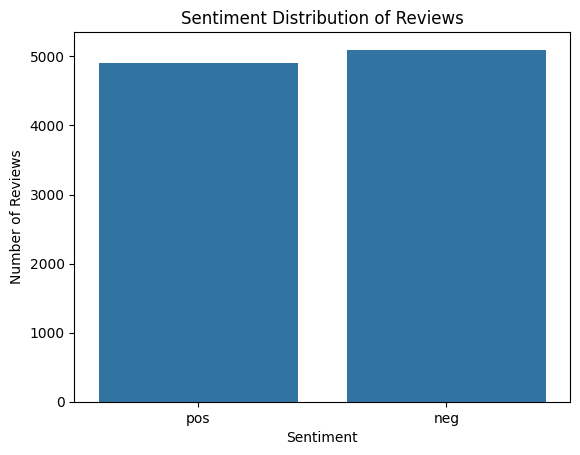

In [18]:
sns.countplot(x='label', data=df)
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

In [19]:
positive_reviews = df[df['label'] == 'pos']['clean_review']
negative_reviews = df[df['label'] == 'neg']['clean_review']

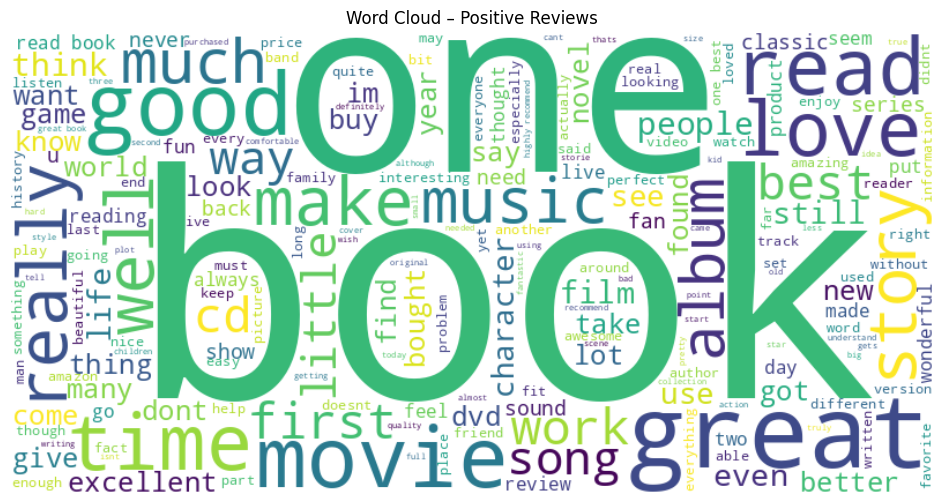

In [20]:
positive_text = " ".join(positive_reviews)

wordcloud_pos = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(positive_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Positive Reviews")
plt.show()

The positive word cloud highlights frequently occurring words such as good, great, excellent, and love, indicating customer satisfaction and favorable product experiences.

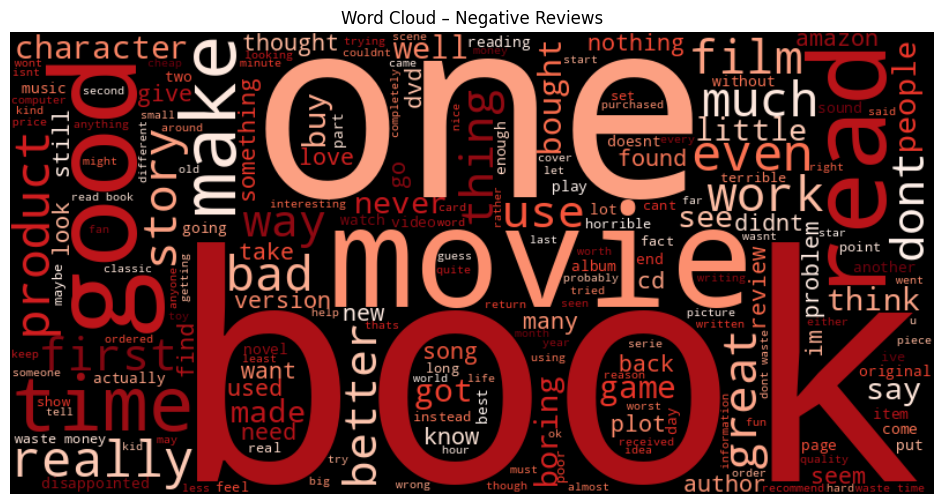

In [21]:
negative_text = " ".join(negative_reviews)

wordcloud_neg = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Reds'
).generate(negative_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Negative Reviews")
plt.show()

The negative word cloud emphasizes words such as bad, worst, poor, and disappointed, reflecting customer dissatisfaction and product issues.

In [22]:
positive_words = " ".join(positive_reviews).split()
pos_common = Counter(positive_words).most_common(10)

pos_common

[('book', 3313),
 ('great', 2087),
 ('one', 1835),
 ('good', 1635),
 ('read', 1553),
 ('like', 1268),
 ('movie', 1085),
 ('would', 943),
 ('love', 902),
 ('time', 871)]

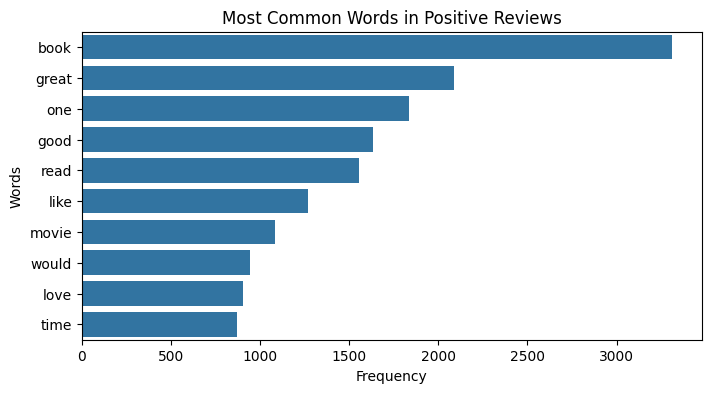

In [23]:
pos_words, pos_counts = zip(*pos_common)

plt.figure(figsize=(8,4))
sns.barplot(x=list(pos_counts), y=list(pos_words))
plt.title("Most Common Words in Positive Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [24]:
negative_words = " ".join(negative_reviews).split()
neg_common = Counter(negative_words).most_common(10)

neg_common

[('book', 3184),
 ('one', 2022),
 ('like', 1547),
 ('movie', 1465),
 ('would', 1438),
 ('dont', 1240),
 ('read', 1187),
 ('get', 1139),
 ('good', 1134),
 ('time', 1034)]

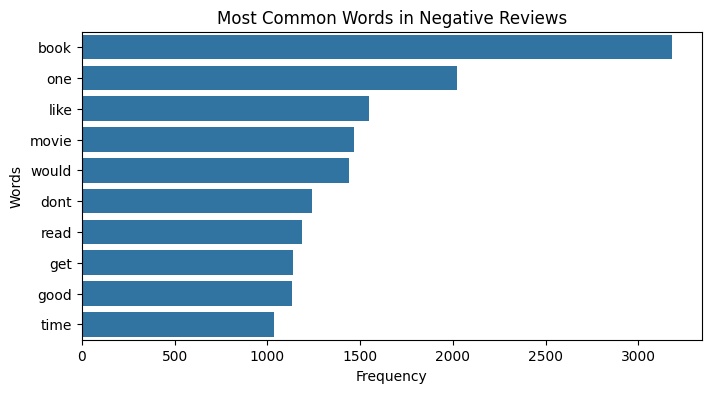

In [25]:
neg_words, neg_counts = zip(*neg_common)

plt.figure(figsize=(8,4))
sns.barplot(x=list(neg_counts), y=list(neg_words))
plt.title("Most Common Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

### 3. Model Development

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [27]:
X = df['clean_review']
y = df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [28]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [32]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8545
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1019
           1       0.85      0.85      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



Logistic Regression with TF-IDF features serves as a strong baseline model for sentiment classification due to its simplicity and interpretability.

In [33]:
#Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [34]:
y_pred_svm = svm_model.predict(X_test_tfidf)

print("SVM Accuracy:",
      accuracy_score(y_test, y_pred_svm))

print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.843
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1019
           1       0.84      0.85      0.84       981

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



SVM achieved strong performance by finding an optimal separating hyperplane in the high-dimensional TF-IDF feature space.

In [35]:
#Neural Network MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    max_iter=300,
    random_state=42
)

mlp_model.fit(X_train_tfidf, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [36]:
y_pred_mlp = mlp_model.predict(X_test_tfidf)

print("Neural Network Accuracy:",
      accuracy_score(y_test, y_pred_mlp))

print(classification_report(y_test, y_pred_mlp))

Neural Network Accuracy: 0.8195
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1019
           1       0.81      0.82      0.82       981

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



The neural network model captures non-linear relationships in textual data and performs competitively with traditional classifiers.

### 4. Validation

In [37]:
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(
    lr_model,
    X_train_tfidf,
    y_train,
    cv=5,
    scoring='accuracy'
)

cv_f1 = cross_val_score(
    lr_model,
    X_train_tfidf,
    y_train,
    cv=5,
    scoring='f1'
)

cv_accuracy.mean(), cv_f1.mean()

(np.float64(0.8585), np.float64(0.8560948050803278))

Five-fold cross-validation was performed to assess the stability of the model. The average accuracy and F1-score across folds indicate consistent performance and good generalization ability.

Model validation was conducted using a train–test split and k-fold cross-validation. Performance was evaluated using accuracy and F1-score. The consistent results across validation strategies demonstrate that the sentiment analysis model generalizes well and performs reliably on unseen customer reviews.